In [2]:
import ScraperFC as sfc
# Opcional si se quiere visualizar algunos datos
import seaborn as sns 
import matplotlib.pyplot as plt
from mplsoccer import Pitch

sofascore = sfc.Sofascore()

c:\Users\USUARIO\.virtualenvs\scraperFC-WyyYYgxL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### URL de un partido especifico

In [9]:
match_url = 'https://www.sofascore.com/huachipato-audax-italiano/mnbsonb#10961808'
home, away = sofascore.get_team_names(match_url)
home = home.replace(" ", "_")
away = away.replace(" ", "_")

### Estadísticas generales del partido

**Recomendación** al obtener el link 'https://www.sofascore.com/huachipato-audax-italiano/mnbsonb#id:10961808 hay que quitarle *id:* quedano asi 'https://www.sofascore.com/huachipato-audax-italiano/mnbsonb#10961808

In [10]:

match_stats = sofascore.get_general_match_stats(match_url)

# Guardar la data en csv
match_stats.to_csv(f'../data/stats_{home}_{away}_sofascore.csv', index=False, sep=';', encoding='utf-8')

### Estadísticas de los jugadores del partido

In [15]:
home_players, away_players = sofascore.get_players_match_stats(match_url) # 0 local, 1 visitante

# Guardar la data en csv
home_players.to_csv(f'../data/stats_match_players_{home}_sofascore.csv', index=False, sep=';', encoding='utf-8')
home_players.to_csv(f'../data/stats_match_players_{away}_sofascore.csv', index=False, sep=';', encoding='utf-8')

### Heatmap de un jugador del partido

**importante** el nombre del jugador tiene que ser igual a como esta en sofascore

c:\Users\USUARIO\.virtualenvs\scraperFC-WyyYYgxL\lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


<bound method _AxesBase.invert_xaxis of <Axes: >>

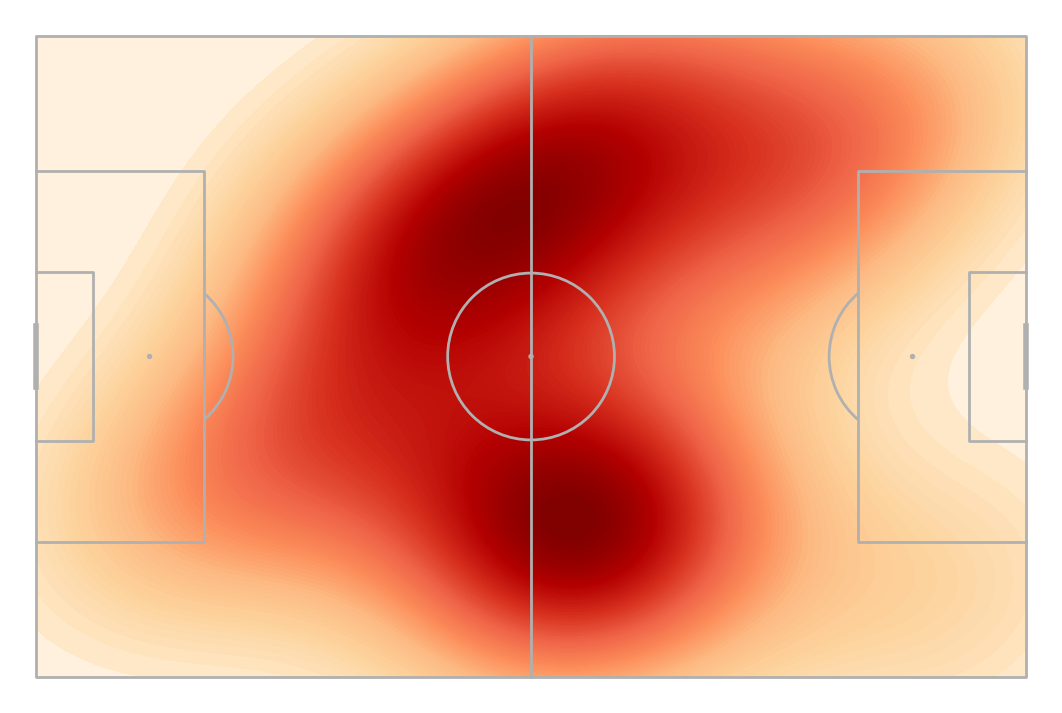

In [24]:

player_name = 'Brayan Palmezano'
mapa_calor = sofascore.get_player_heatmap(match_url, player_name)

# Opcional, visualizar el heatmap
gif, ax = plt.subplots(figsize=(16,9))

cmap = 'hot'
pitch = Pitch(pitch_type='opta')
pitch.draw(ax=ax)
pitch.kdeplot(mapa_calor.x, mapa_calor.y, ax=ax,
              levels=100,
              shade=True,
              zorder=-1,
              shade_lowest=True,
              cmap='OrRd')

plt.gca().invert_xaxis

### Posiciones promedios de los jugadores en el partido

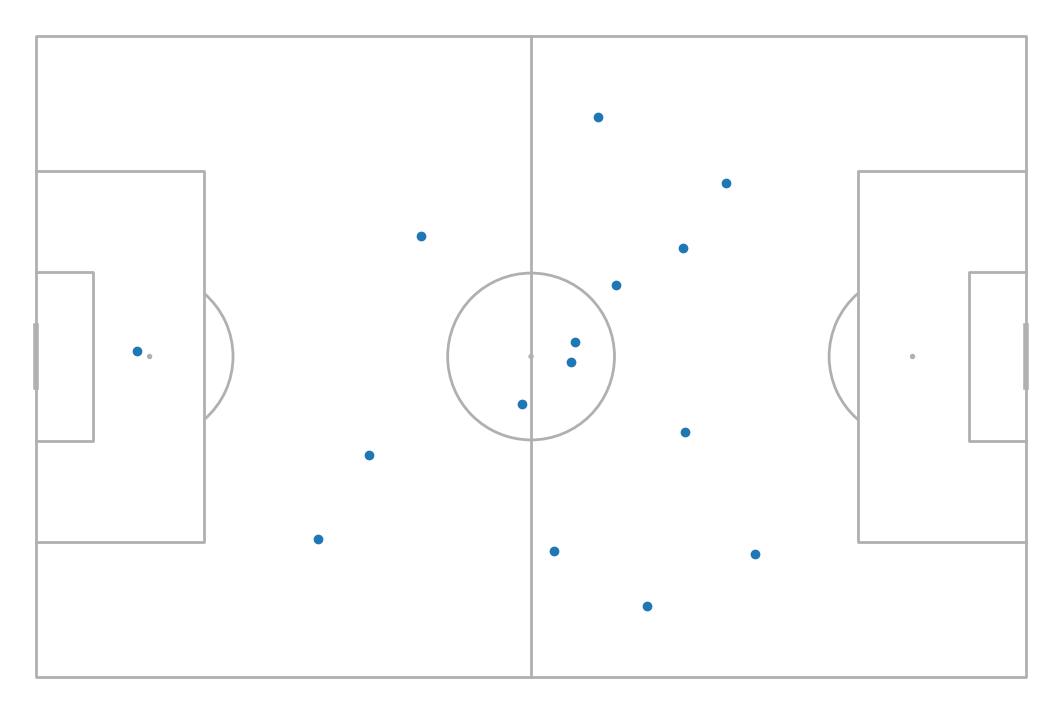

In [26]:
posiciones_promedio = sofascore.get_players_average_positions(match_url)[0] # [0] local, [1] visitante

# Opcional si se quiere visualizar
fig, ax = plt.subplots(figsize=(16,9))

pitch = Pitch(pitch_type='opta')
pitch.draw(ax=ax)
pitch.scatter(posiciones_promedio.averageX, posiciones_promedio.averageY, ax=ax)

### Obtener el match momentum 

<BarContainer object of 25 artists>

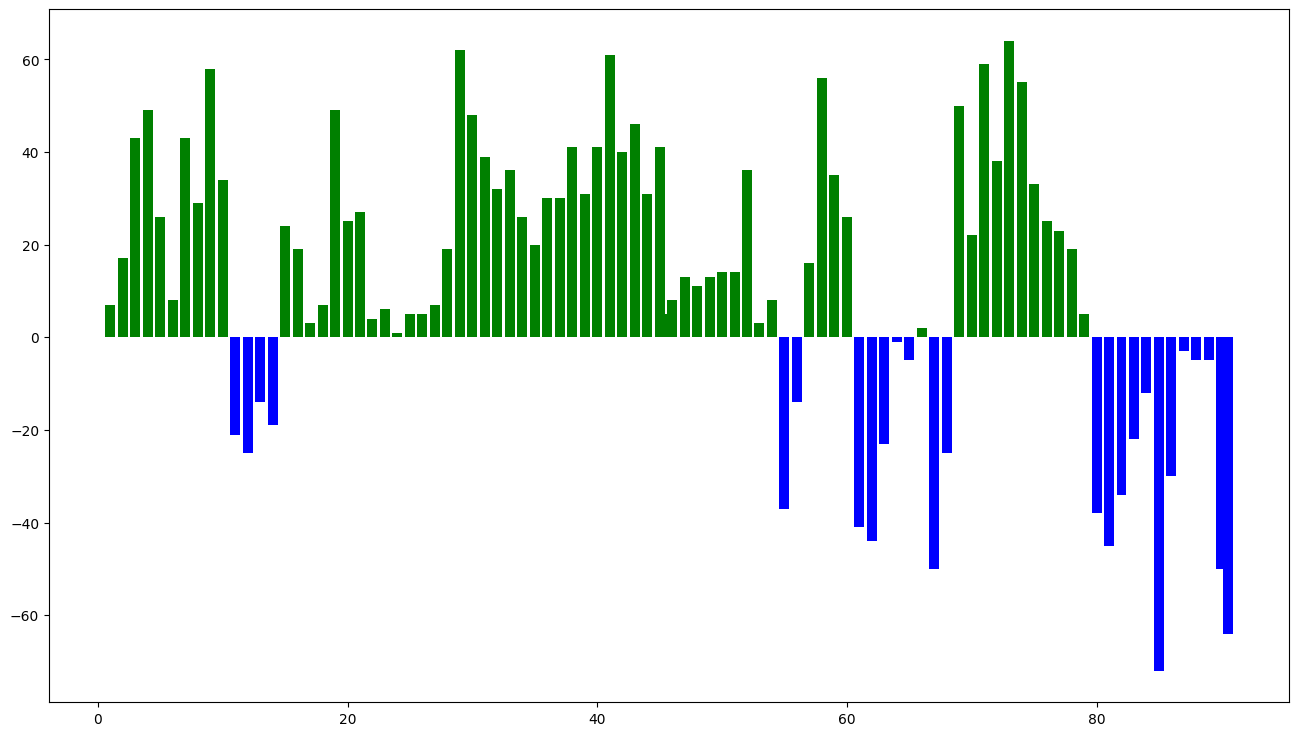

In [29]:
match_momentum = sofascore.match_momentum(match_url)

match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visit = match_momentum[match_momentum['value'] < 0]

# opcional visualizarlo
fig, ax = plt.subplots(figsize=(16,9))

plt.bar(match_momentum_local.minute, match_momentum_local.value, color='green')
plt.bar(match_momentum_visit.minute, match_momentum_visit.value, color='blue')

### Estadísticas de la liga
- Opcional se puede obtener por posición *selected_positions=[posicion segun libreria]*
- Se pueden datos totaltes *'total'* o ponderado cada 90 minutos *'per90'*

In [3]:
year = '2023'
league = 'Chile Primera Division'

stats_league = sofascore.scrape_league_stats(year, league, accumulation='per90')

# Guardar la data en csv
stats_league.to_csv(f'../data/stats_{league.replace(" ", "_")}_{year.replace("/", "_")}_sofascore.csv', index=False, sep=';', encoding='utf-8')

End of the pages


**Opcional** Obtener las estadísticas de la liga por posición

In [36]:
selected_positions=['Goalkeepers', 'Defenders', 'Midfielders', 'Forwards'] # posiciones
posicion_selected = selected_positions[3] # cambiar el indice segun la posicion

sofascore.scrape_league_stats(year, league, accumulation='per90', selected_positions=[posicion_selected])

# Guardar la data en csv
stats_league.to_csv(f'../data/stats_{league.replace(" ", "_")}_{year.replace("/", "_")}_{posicion_selected}_sofascore.csv', index=False, sep=';', encoding='utf-8')

End of the pages
